# Dimensionality Reduction Method with Principal Component Analysis (PCA) in Python
# PCA is an Unsurpersived machine learning method used in data mining to reduce the dimensionality of large datasets.
# How PCA work? PCA keeps or retains features with higher variance and discards the features with lower variance. 
# PCA assumes that features have linearity, features with higher variance are important, and features with lower variance are not important and therefore, must be discarded. 
# PCA works with continuous variables because it is a process of rotating data from one coordinate system to another. 
# Continuous variables are measurable. 
# Discrete variables are countable.

# Python PCA Tools with JupyterLab

In [1]:
from platform import python_version
print(python_version())

3.11.7


In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from pandas.plotting import table
import numpy as np
import csv

# Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca=PCA()

import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams['figure.max_open_warning']=False

# Display Multiple Outputs in a cell
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

# Configure pandas display options
pd.set_option('display.max_columns', None)


# Suppress warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Collect Data

In [56]:
data = pd.read_csv('data.csv')
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [58]:
data.shape

(10000, 50)

# Data preprocessing

In [59]:
df = data.select_dtypes('number')
df.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [60]:
df.shape

(10000, 23)

In [64]:
df = data.select_dtypes('number')
df.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [65]:
df1 = data.select_dtypes(exclude = 'object')
df1.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [66]:
df1.shape

(10000, 23)

In [67]:
df_cont = df.drop(['CaseOrder', 'Zip', 'Population', 'Children', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
df_cont.columns

Index(['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

In [68]:
df_cont.shape

(10000, 9)

In [77]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df_cont)
df_norm
df_norm = pd.DataFrame(df_norm, columns = df_cont.columns)
df_norm.head()

,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


In [50]:
from sklearn.decomposition import PCA
pca = PCA()

In [78]:
pc=pca.fit_transform(df_norm)

loading = pd.DataFrame(pca.components_, columns=df_cont.columns, index=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9')).T
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Age,0.085241,0.701020,-0.021650,-0.012275,-0.018288,-0.010093,-0.018179,0.706561,0.026277
Income,-0.020628,-0.018996,-0.394809,0.399435,-0.588585,0.530645,-0.236152,0.002400,0.001284
VitD_levels,-0.002423,0.020313,0.521997,0.407359,0.337957,0.169445,-0.646703,-0.002205,-0.001504
Doc_visits,-0.007148,0.016043,-0.113449,0.814343,0.096307,-0.430289,0.359499,0.001254,-0.001108
Full_meals_eaten,-0.020260,0.031079,0.612834,0.092652,-0.155071,0.481092,0.599056,0.010328,-0.001609
vitD_supp,0.025338,0.015065,-0.426745,0.047079,0.710181,0.522461,0.193600,0.000587,-0.000603
Initial_days,0.700854,-0.090544,0.012067,0.011716,-0.020984,0.003895,0.003240,0.031718,-0.706294
TotalCharge,0.701943,-0.079929,0.014701,0.013350,-0.019300,0.004421,0.004672,-0.031288,0.706470
Additional_charges,0.085316,0.701256,-0.016336,-0.009422,-0.022948,-0.002139,-0.007473,-0.706164,-0.036751


In [79]:
exp_variance=pca.explained_variance_ratio_

In [80]:
pcomp=np.arange(pca.n_components_)+1

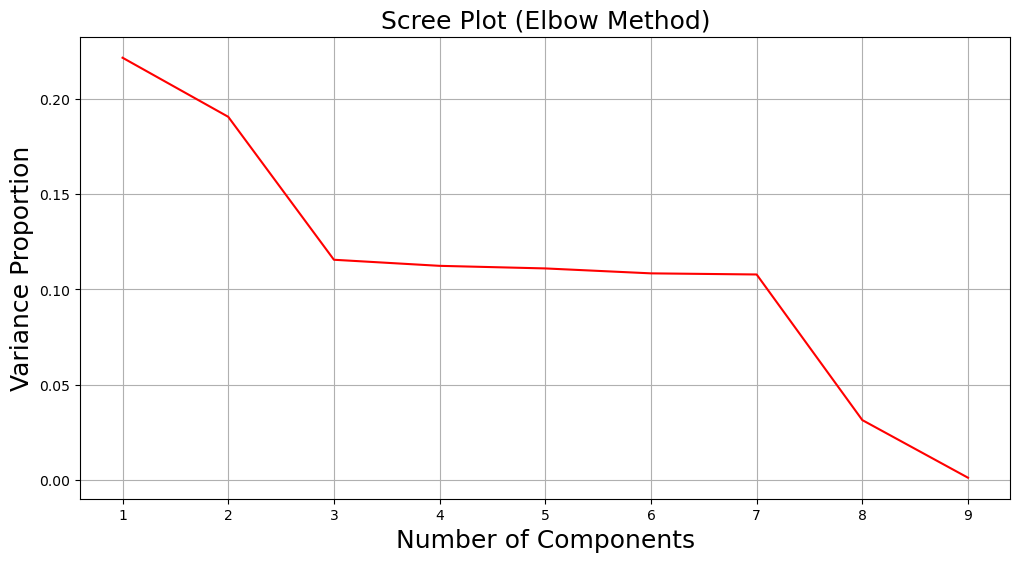

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(pcomp,
         exp_variance,
         'r-')
plt.title('Scree Plot (Elbow Method)', fontsize=18)
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Variance Proportion', fontsize=18)
plt.grid()
plt.show()

# The Elbow Standard above determined that 2 PCs are significant. 

In [82]:
print(dict(zip(['PC1', 'PC2'], pcomp)))

{'PC1': 1, 'PC2': 2}


In [84]:
print('Variance of the first four principal components:')
print(pca.explained_variance_[:2])

Variance of the first four principal components:
[1.99341409 1.71462424]


In [85]:
Total_captured_variance= 1.99341409+1.71462424
Total_captured_variance

3.70803833